In [1]:
import sys
print(sys.executable)

C:\Users\steve\.conda\envs\tf-gpu1.15\python.exe


In [2]:
# !pip3 install -U spacy
# !python -m spacy download en_core_web_sm
# !pip3 install jupyterthemes
# !pip3 install termcolor
# !pip3 install plotly
# !pip3 install cufflinks
# !pip3 install wordcloud

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:200% !important; }</style>"))

In [4]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 120%; }
    div#menubar-container     { width: 120%; }
    div#maintoolbar-container { width: 120%; }
</style>
"""))

In [5]:
from jupyterthemes import jtplot

# choose which theme to inherit plotting style from
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
jtplot.style(theme='onedork')

# set "context" (paper, notebook, talk, poster)
# scale font-size of ticklabels, legend, etc.
# remove spines from x and y axes and make grid dashed
jtplot.style(context='talk', fscale=1.4, spines=False, gridlines='--')

# turn on X- and Y-axis tick marks (default=False)
# turn off the axis grid lines (default=True)
# and set the default figure size
jtplot.style(ticks=True, grid=False, figsize=(6, 4.5))

# reset default matplotlib rcParams
jtplot.reset()

ModuleNotFoundError: No module named 'jupyterthemes'

# Reading data

In [53]:
# !pip install langdetect
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\steve\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [49]:
import json
import pandas as pd
import csv
import os
import re #regular expression
from textblob import TextBlob
import string
import preprocessor as p
from termcolor import colored
import matplotlib.pyplot as plt
import warnings, logging
from nltk.stem import PorterStemmer        # module for stemming

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [8]:
with open('total_text.txt', encoding="utf8") as fopen:
    data = fopen.read().split('\n')[:-1]
len(data)

5657

In [9]:
data = pd.DataFrame(data, columns =['full_text'])

In [11]:
data.shape

(5657, 1)

In [12]:
data

,full_text
0,Starving plead help runs wild video based
1,People dropping like flies.Black death happeni...
2,Humor best medicine fight
3,footage Wuhan doctor mental breakdown
4,Wuhan began blocking major roads early hours T...
...,...
5652,china news ’ show Another body found mall wuha...
5653,Glad people finally caught coronoavirus WuhanC...
5654,Coronavirus impacts U.S. stock markets Dow Dro...
5655,tomgwilliam3 Realisation slowly dawns poor Bar...


In [13]:
data = data.dropna().reset_index(drop=True)

In [14]:
data.shape

(5657, 1)

In [15]:
def makelist(lst): 
    return [[el] for el in lst]

# Cleaning

#### Adding TQDM 

In [16]:
# from langdetect import detect
from tqdm import tqdm_notebook
tqdm_notebook().pandas()

C:\Users\steve\.conda\envs\tf-gpu1.15\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


#### Tokenization

In [134]:
from nltk.tokenize import sent_tokenize

In [135]:
data['sentences'] = data.full_text.progress_map(sent_tokenize)
data['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

['Starving plead help runs wild video based']

In [136]:
data['sentences'] = [[tokens.lower() for tokens in sentences] for sentences in data['sentences']]

In [137]:
data['sentences']

0             [starving plead help runs wild video based]
1       [people dropping like flies.black death happen...
2                             [humor best medicine fight]
3                 [footage wuhan doctor mental breakdown]
4       [wuhan began blocking major roads early hours ...
                              ...                        
5652    [china news ’ show another body found mall wuh...
5653    [glad people finally caught coronoavirus wuhan...
5654    [coronavirus impacts u.s. stock markets dow dr...
5655    [tomgwilliam3 realisation slowly dawns poor ba...
5656    [man coronavirus discharged toronto hospital n...
Name: sentences, Length: 5657, dtype: object

In [138]:
from nltk.tokenize import word_tokenize

In [139]:
data['tokens_sentences'] = data['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(data['tokens_sentences'].head(1).tolist()[0][:3])


[['starving', 'plead', 'help', 'runs', 'wild', 'video', 'based']]


In [140]:
data['tokens_sentences']

0       [[starving, plead, help, runs, wild, video, ba...
1       [[people, dropping, like, flies.black, death, ...
2                        [[humor, best, medicine, fight]]
3           [[footage, wuhan, doctor, mental, breakdown]]
4       [[wuhan, began, blocking, major, roads, early,...
                              ...                        
5652    [[china, news, ’, show, another, body, found, ...
5653    [[glad, people, finally, caught, coronoavirus,...
5654    [[coronavirus, impacts, u.s., stock, markets, ...
5655    [[tomgwilliam3, realisation, slowly, dawns, po...
5656    [[man, coronavirus, discharged, toronto, hospi...
Name: tokens_sentences, Length: 5657, dtype: object

In [141]:
# tokens_listed = [[[print(w) for w in tokens] for tokens in sentences] for sentences in data['tokens_sentences']]

In [142]:
# Remove punctuation from each word
puncts = str.maketrans('', '', string.punctuation)
data['tokens_sentences'] = [[[w.translate(puncts) for w in tokens] for tokens in sentences] for sentences in data['tokens_sentences']]

In [143]:
# filter out short tokens
#data['tokens_sentences'] = [[[w for w in tokens if len(w) > 2] for tokens in sentences] for sentences in data['tokens_sentences']]

#### Regrouping tokens and removing stop words

In [144]:
#Remove stopwords
from nltk.corpus import stopwords
stopwords_verbs = ['say', 'get', 'go', 'know', 'may', 'need', 'like', 'make', 'see', 'want', 'come', 'take', 'use', 'should', 'would', 'can','could']
stopwords_other = ['wuhan', 'china', 'wuhanvirus', 'one', 'two', 'corona', 'rt', 'https', 'http', 'coronovirus', 'coronoavirus', 'image', 'coronavirus', 'covid', 'die', 'thing', 'time', 'pandemic', 'de', 'en', 'caption', 'also', 'copyright', 'something']
my_stopwords = stopwords.words('English') + stopwords_verbs + stopwords_other

In [145]:
from itertools import chain # to flatten list of sentences of tokens into list of tokens

In [146]:
data['tokens_without_sw'] = data['tokens_sentences'].map(lambda sentences: list(chain.from_iterable(sentences)))
data['tokens_without_sw'] = data['tokens_without_sw'].map(lambda tokens: [token.lower() for token in tokens if token.isalpha() 
                                                    and token.lower() not in my_stopwords and len(token)>1])

In [147]:
data['tokens_without_sw'] = makelist(data['tokens_without_sw'])

In [148]:
data['tokens_without_sw']#.head(1).tolist()[0][:30]

0       [[starving, plead, help, runs, wild, video, ba...
1       [[people, dropping, fliesblack, death, happeni...
2                        [[humor, best, medicine, fight]]
3                  [[footage, doctor, mental, breakdown]]
4       [[began, blocking, major, roads, early, hours,...
                              ...                        
5652    [[news, show, another, body, found, mall, wuha...
5653    [[glad, people, finally, caught, wuhancoronavi...
5654    [[impacts, us, stock, markets, dow, drops, poi...
5655    [[realisation, slowly, dawns, poor, barry, fac...
5656    [[man, discharged, toronto, hospital, novelcor...
Name: tokens_without_sw, Length: 5657, dtype: object

In [149]:
#Remove quotes
data['tokens_without_sw'] = [[[re.sub("\'","",word) for word in tokens] for tokens in sentences] for sentences in data['tokens_without_sw']]

In [150]:
data['tokens'] = data['tokens_without_sw'].map(lambda sentences: list(chain.from_iterable(sentences)))

#### Prepare bi-grams and tri-grams

In [39]:
import gensim
from gensim.models import Phrases

stop_words = stopwords.words('english')
stop_words.extend(['RT'])

In [40]:
# tokens = data['tokens'].tolist()

# # Build the bigram and trigram models
# bigram = Phrases(tokens)#, min_count=5, threshold=10, common_terms=stop_words)  # higher threshold fewer phrases.
# trigram = Phrases(bigram[tokens], min_count=1)

# # Faster way to get a sentence clubbed as a trigram/bigram
# bigram_mod = gensim.models.phrases.Phraser(bigram)
# trigram_mod = gensim.models.phrases.Phraser(trigram)

In [42]:
# tokens = data['tokens'].tolist()
# bigram_model = Phrases(tokens)
# trigram_model = Phrases(bigram_model[tokens], min_count=1)
# data['tokens'] = list(bigram[tokens])

In [151]:
data['tokens'] = makelist(data['tokens'])

In [152]:
data['tokens']

0       [[starving, plead, help, runs, wild, video, ba...
1       [[people, dropping, fliesblack, death, happeni...
2                        [[humor, best, medicine, fight]]
3                  [[footage, doctor, mental, breakdown]]
4       [[began, blocking, major, roads, early, hours,...
                              ...                        
5652    [[news, show, another, body, found, mall, wuha...
5653    [[glad, people, finally, caught, wuhancoronavi...
5654    [[impacts, us, stock, markets, dow, drops, poi...
5655    [[realisation, slowly, dawns, poor, barry, fac...
5656    [[man, discharged, toronto, hospital, novelcor...
Name: tokens, Length: 5657, dtype: object

In [153]:
'''clean_total_text = open('clean_total_text.txt', 'w', encoding='UTF-8')
for tok in data['tokens']:
    clean_total_text.write(" ".join(tok))
    clean_total_text.write('\n')

clean_total_text.close()'''

'clean_total_text = open(\'clean_total_text.txt\', \'w\', encoding=\'UTF-8\')\nfor tok in data[\'tokens\']:\n    clean_total_text.write(" ".join(tok))\n    clean_total_text.write(\'\n\')\n\nclean_total_text.close()'

#### Lemmatizing with POS tagging

In [154]:
from nltk import pos_tag

In [155]:
data['POS_tokens'] = data['tokens'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(data['POS_tokens'].head(1).tolist()[0][:3])
# data['POS_tokens'][0][0][0][0]


[[('starving', 'VBG'), ('plead', 'NN'), ('help', 'NN'), ('runs', 'VBZ'), ('wild', 'JJ'), ('video', 'NNS'), ('based', 'VBN')]]


In [277]:
# import spacy
# nlp = spacy.load('en', disable=['parser', 'ner'])

# allowed_postags=['NOUN']

# def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
#     """https://spacy.io/api/annotation"""
#     texts_out = []
#     for sent in texts:
#         doc = nlp(" ".join(sent))
#         texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
#     return texts_out

# data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN'])

In [156]:
from nltk.corpus import wordnet

def get_wordnet_pos_Noun(treebank_tag):
    
    if treebank_tag.startswith('N'):
        return wordnet.NOUN
    else:
        return ''
    
    
def get_wordnet_pos(treebank_tag):
    
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return ''

from nltk.stem.wordnet import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

In [187]:
# Lemmatizing each word with its POS tag, in each sentence stemmer.stem(el[0])
data['tokens_sentences_stemmed'] = data['POS_tokens'].progress_map(
    lambda list_tokens_POS: [
        [
#             stemmer.stem(el[0]) 
            lemmatizer.lemmatize(el[0], get_wordnet_pos(el[1])) 
            if get_wordnet_pos_Noun(el[1]) != '' else '' for el in tokens_POS
        ] 
        for tokens_POS in list_tokens_POS
    ]
)

# data['tokens_sentences_stemmed'] = for 

In [190]:
data['tokens_sentences_stemmed'].head(1).tolist()[0][:3]

[['plead', 'help', 'video']]

In [189]:
data['tokens_sentences_stemmed'] = [[list(filter(None, token)) for token in sentences] for sentences in data['tokens_sentences_stemmed']]

In [191]:
fresh_tweets = data['tokens_sentences_stemmed'].map(lambda sentences: list(chain.from_iterable(sentences)))

with open('preprocessed_btm_tweets.txt', 'w', encoding='UTF-8') as f:
    for tweet in fresh_tweets:
        f.write(' '.join(tweet)+"\n")

# LDA

## Data preparation

#### Prepare objects for LDA gensim implementation

In [192]:
from gensim import corpora

In [193]:
data['tokens'] = data['tokens_sentences_stemmed'].map(lambda sentences: list(chain.from_iterable(sentences)))

In [194]:
tokens = data['tokens'].tolist()

In [195]:
dictionary_LDA = corpora.Dictionary(tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(tok) for tok in tokens]

## Running LDA

In [196]:
from gensim import models
import numpy as np

In [197]:
np.random.seed(123456)
num_topics = 10
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, iterations=100, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

# %time lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary_LDA, num_topics=num_topics, \
#                                            random_state=100, \
#                                            chunksize=10, \
#                                            passes=4, \
#                                            alpha=[0.01]*num_topics, \
#                                            eta=[0.01]*len(dictionary_LDA.keys()), \
#                                            per_word_topics=True)

Wall time: 3.88 s


## Quick exploration of LDA results

#### Looking at topics

In [198]:
# for idx, topic in lda_model.print_topics(-1):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    

for idx,topic in lda_model.show_topics(formatted=False, num_topics=num_topics, num_words=20):
#     print('Topic: {} \nWords: {}'.format(idx, topic))
    print(colored('Topic #{} \nWords: '.format(idx), 'green', attrs=['bold'])+"[")
    for w in topic:
        print("        '"+w[0]+" ("+str(w[1])+")'") 
    print("]\n")

Topic #0 
Words: [
        'virus (0.115407534)'
        'sars (0.038500465)'
        'news (0.030043257)'
        'explainer (0.029730381)'
        'outbreak (0.026845042)'
        'bioweapon (0.025087804)'
        'animal (0.024307968)'
        'market (0.023097817)'
        'week (0.022401558)'
        'source (0.021771742)'
        'ncov (0.017275779)'
        'ban (0.01377728)'
        'response (0.013260708)'
        'bat (0.0129867755)'
        'travel (0.011806164)'
        'snake (0.00996127)'
        'place (0.009788514)'
        'watch (0.009784825)'
        'trade (0.009352821)'
        'today (0.00924043)'
]

Topic #1 
Words: [
        'outbreak (0.029812586)'
        'spread (0.02919415)'
        'novel (0.029179513)'
        'disease (0.027626947)'
        'infection (0.023928748)'
        'health (0.022233305)'
        'vaccine (0.020296007)'
        'expert (0.020081006)'
        'level (0.020044813)'
        'time (0.018964397)'
        'emergency (0.015802993)'
     

## Advanced exploration of LDA results

#### Allocation of topics in all documents

In [288]:
topics = [lda_model[corpus[i]] for i in range(len(data))]

In [289]:
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res

topics_document_to_dataframe([(9, 0.03853655432967504), (15, 0.09130117862212643), (18, 0.8692868808484044)], 20)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0385366,NaN,NaN,NaN,NaN,NaN,0.0913012,NaN,NaN,0.869287,NaN


In [290]:
# Like TF-IDF, create a matrix of topic weighting, with documents as rows and topics as columns
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=num_topics) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [291]:
document_topic.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.978046
1,0.0,0.0,0.0,0.0,0.000000,0.000000,0.357251,0.000000,0.000000,0.623230
2,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.978046,0.000000
3,0.0,0.0,0.0,0.0,0.000000,0.970965,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.531423,0.243000,0.000000,0.221228,0.000000,0.000000


In [292]:
# Which document are about topic 14
document_topic.sort_values(4, ascending=False)[4].head(20)

1083    0.995927
3681    0.995734
4467    0.995522
4322    0.995522
4582    0.995522
1772    0.995522
5121    0.995522
1647    0.995522
3905    0.995522
1884    0.995522
1066    0.995288
4164    0.995288
1017    0.995288
722     0.995288
515     0.995288
4725    0.995288
3966    0.995288
4131    0.995027
4152    0.994736
770     0.994736
Name: 4, dtype: float64

In [293]:
print(data.full_text.loc[91][:1000])

Opt surgical masks N95 masks protection Experts


#### Looking at the distribution of topics in all documents

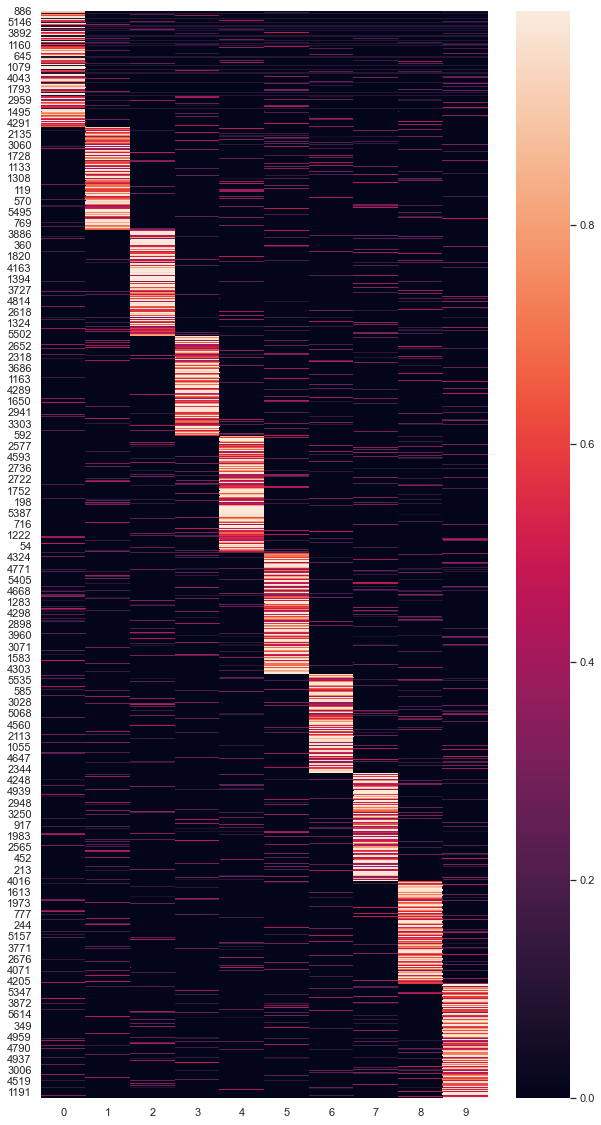

In [294]:
%matplotlib inline
import seaborn as sns; sns.set(rc={'figure.figsize':(10,20)})
sns.heatmap(document_topic.loc[document_topic.idxmax(axis=1).sort_values().index])

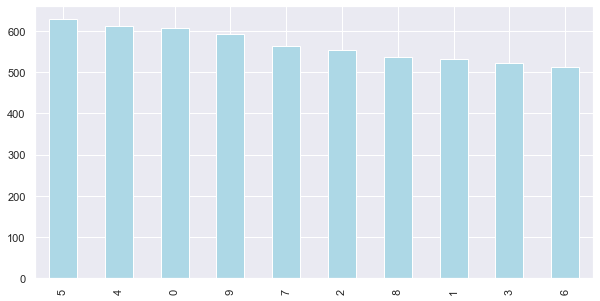

In [295]:
sns.set(rc={'figure.figsize':(10,5)})
document_topic.idxmax(axis=1).value_counts().plot.bar(color='lightblue')

#### Visualizing topics

In [296]:
# !pip3 install pyLDAvis

In [297]:
# https://cran.r-project.org/web/packages/LDAvis/vignettes/details.pdf
# Here a short legend to explain the vis:
# size of bubble: proportional to the proportions of the topics across the N total tokens in the corpus
# red bars: estimated number of times a given term was generated by a given topic
# blue bars: overall frequency of each term in the corpus
# -- Relevance of words is computed with a parameter lambda
# -- Lambda optimal value ~0.6 (https://nlp.stanford.edu/events/illvi2014/papers/sievert-illvi2014.pdf)
%matplotlib inline
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=lda_model, corpus=corpus, dictionary=dictionary_LDA)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

### Dominant topic and its percentage contribution

In [298]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=tokens)
# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,9.0,0.9780,"amp, infect, virus_visual, explainer_via, student, outbreak, look, coronavir...","[starving_plead, help_runs, wild_video, base]"
1,1,9.0,0.6232,"amp, infect, virus_visual, explainer_via, student, outbreak, look, coronavir...","[people_dropping, fliesblack, death, happening_right]"
2,2,8.0,0.9780,"virus, news, amp, chinese, spread, people, ppl, world, healthcare, get","[humor, best, medicine, fight]"
3,3,5.0,0.9710,"case, amp, novel, report, travel, confirm, hong_kong, chinese, infection, go...","[footage, doctor, mental_breakdown]"
4,4,4.0,0.5314,"hospital, patient, day, case, say, new, people, city, build, medical","[begin, block, major, road, early, hour, thursday, morning, large, number, p..."
5,5,4.0,0.5747,"hospital, patient, day, case, say, new, people, city, build, medical","[large, number, arm, police, hankou, railway_station, tianhe, airport, excep..."
6,6,0.0,0.1000,"chinese, amp, people, outbreak, mask, medical, help, citizen, news, flight",[]
7,7,3.0,0.5515,"spread, new_york, vaccine, new, take, month, die, hong_kong, virus, deadly","[thanks, constant, update, colleague, expert, amaze, follow, write, learn, o..."
8,8,2.0,0.9824,"outbreak, virus, expert, spread, rise, bioweapon, death_toll, chinese, amp, new","[snake, probable, wildlife, animal, reservoir]"
9,9,1.0,0.9823,"virus, amp, people, city, mortality_rate, health, chinese, world, cases_deat...","[cathay, pacific, staff, wear, face_mask]"


### The most representative sentence for each topic

In [299]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 80

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9953,"chinese, amp, people, outbreak, mask, medical, help, citizen, news, flight","[interesting, note, error, situation, report, publish, january, originally, ..."
1,1.0,0.9953,"virus, amp, people, city, mortality_rate, health, chinese, world, cases_deat...","[recommend, careful, lot, info, spread, expert, amp, fearmongers, twitter, s..."
2,2.0,0.9963,"outbreak, virus, expert, spread, rise, bioweapon, death_toll, chinese, amp, new","[snapshot, group, show, illegal, wildlife, trader, still, trade, wildlife, p..."
3,3.0,0.9957,"spread, new_york, vaccine, new, take, month, die, hong_kong, virus, deadly","[live, shanghai, stock, trader, australia, hospital, close, cny, eve, patien..."
4,4.0,0.9959,"hospital, patient, day, case, say, new, people, city, build, medical","[worker, part, task_force, build, massive, new, bed, emergency, care, hospit..."
5,5.0,0.9961,"case, amp, novel, report, travel, confirm, hong_kong, chinese, infection, go...","[jpn, scholar, homare, endo, hubei, block, epi, week, hubei, people, cong, j..."
6,6.0,0.9955,"mask, via, cases_confirmed, case, update, australia, death, please, virus, q...","[government, journalist, go, real, hard, fact, search, twitter, video, peopl..."
7,7.0,0.9959,"virus, say, outbreak, sars, people, case, spread, control, symptom, much","[nurse, comment, video, confirm, three, dead_body, cover, whitesheet, hallwa..."
8,8.0,0.9964,"virus, news, amp, chinese, spread, people, ppl, world, healthcare, get","[chinese, arrest, spread, rumor, early_dec, brave, chinese, spread, news, am..."
9,9.0,0.9953,"amp, infect, virus_visual, explainer_via, student, outbreak, look, coronavir...","[recommend, respiratory, etiquette, country, million, spit, matter, course, ..."


### Frequency Distribution of Word Counts in Documents

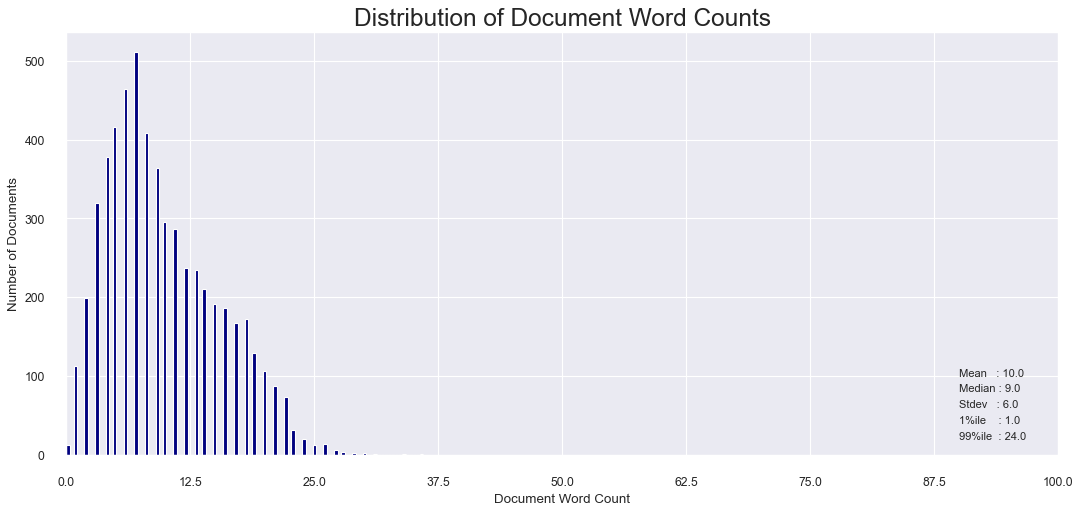

In [300]:
# import plotly as plt

doc_lens = [len(d) for d in df_dominant_topic.Text]
# print(doc_lens)
# Plot

labels = ["Mean   : " + str(round(np.mean(doc_lens))), "Median : " + str(round(np.median(doc_lens))), "Stdev   : " + str(round(np.std(doc_lens))), "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))), "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99)))]
colors = ['red']

# fig, ax = plt.subplots(1, 1)
plt.figure(figsize=(16,7), dpi=80)


# ax.hist(doc_lens, bins = 200, density=True, histtype='bar', color=colors)
# ax.legend(prop={'size': 10})
# ax.set_title('bars with legend')


plt.hist(doc_lens, bins = 100, color='navy')
plt.text(90, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(90, 80, "Median : " + str(round(np.median(doc_lens))))
plt.text(90, 60, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(90, 40, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(90, 20, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,100,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
# plt.show()

# fig.tight_layout()
plt.show()

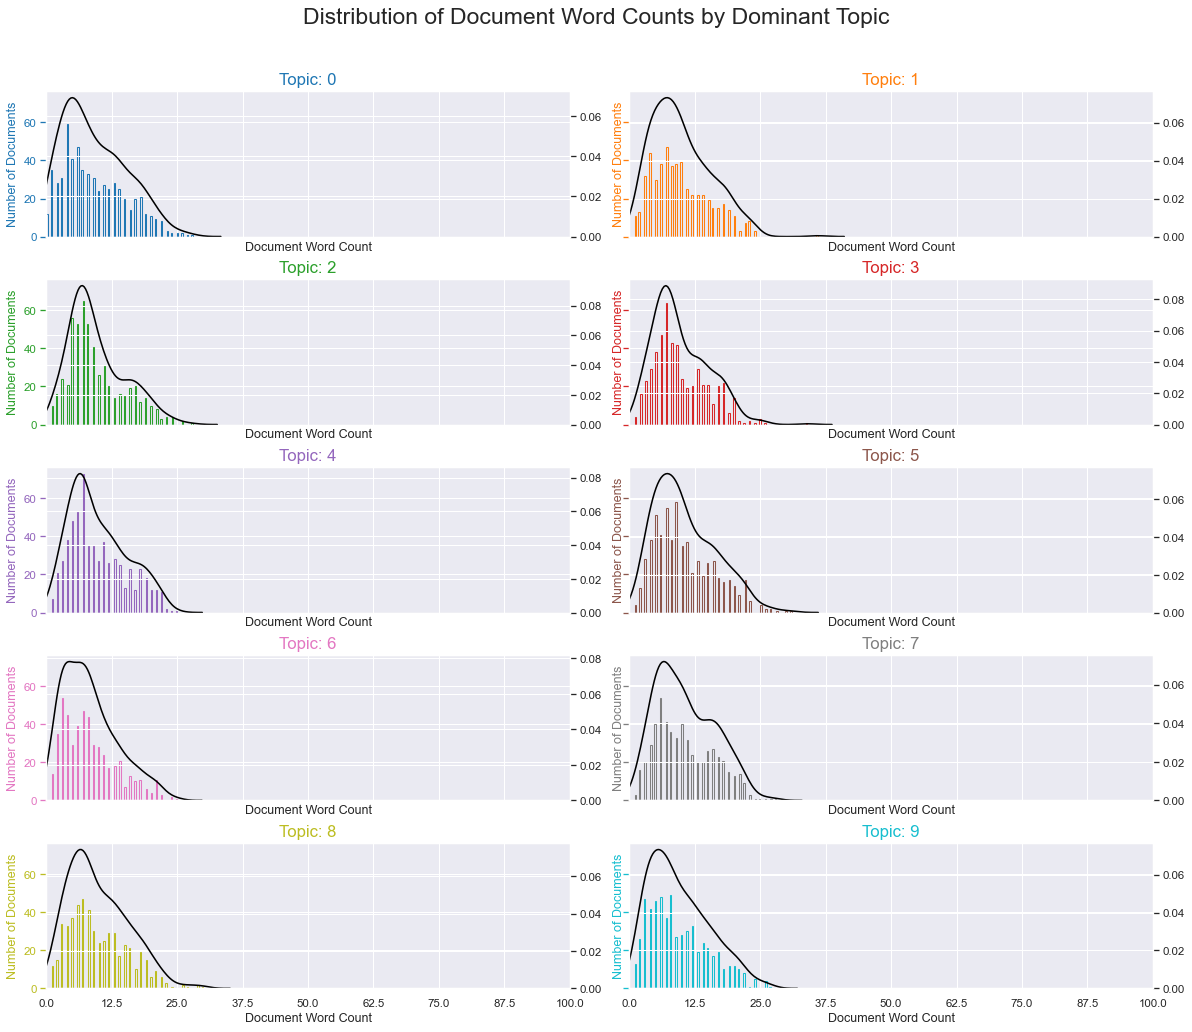

In [301]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=75, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, histtype='step', color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

###  Word Clouds of Top N Keywords in Each Topic

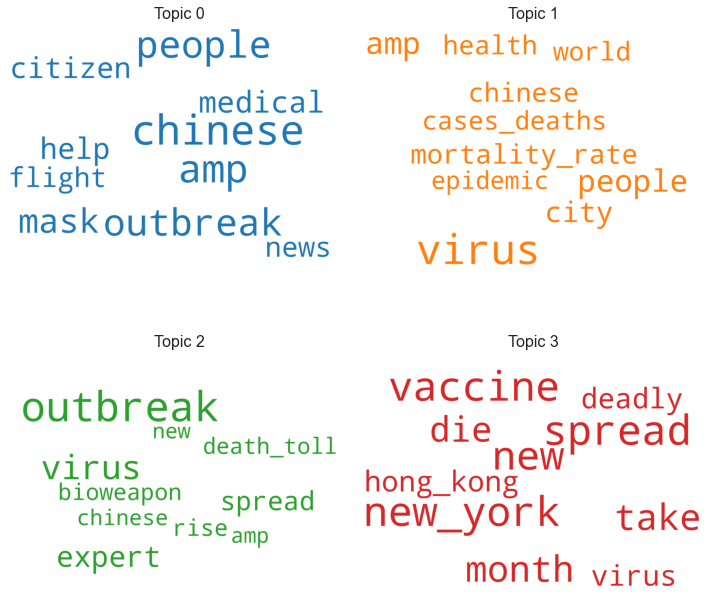

In [302]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### Word Counts of Topic Keywords

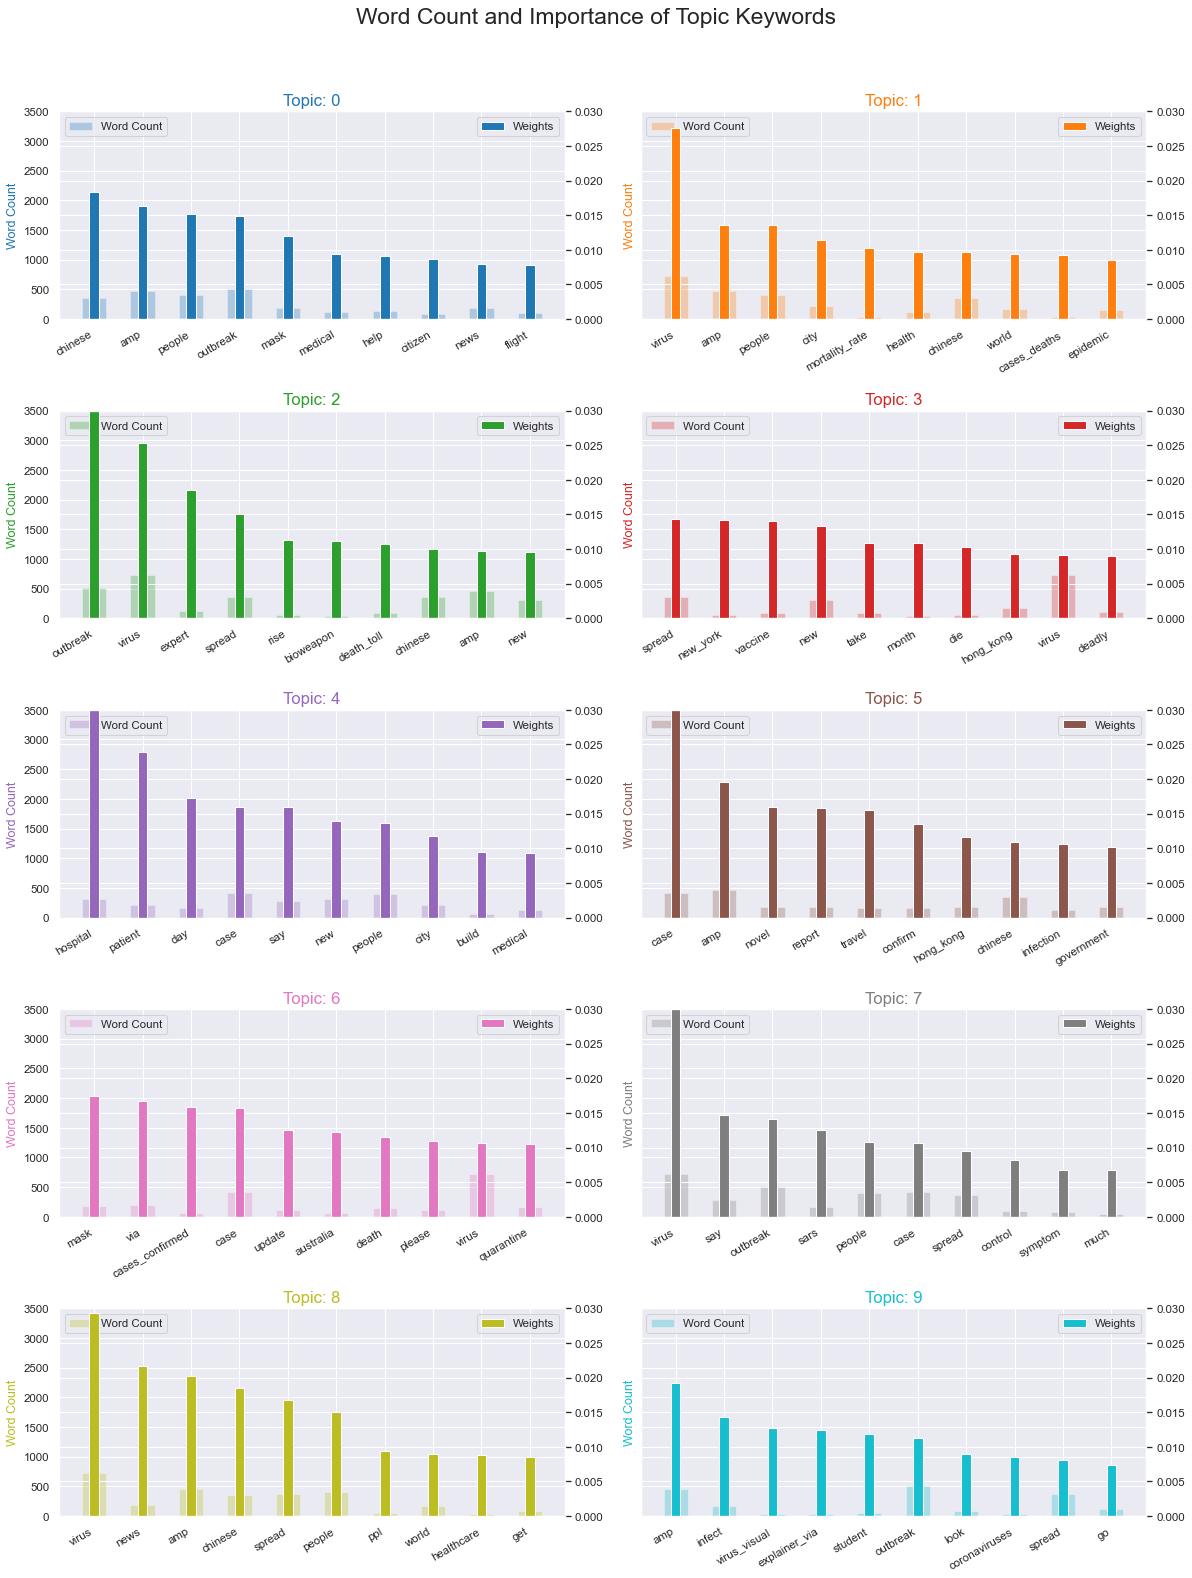

In [303]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in tokens for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,20), sharey=True, dpi=75)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

### The most discussed topics in the documents

In [305]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

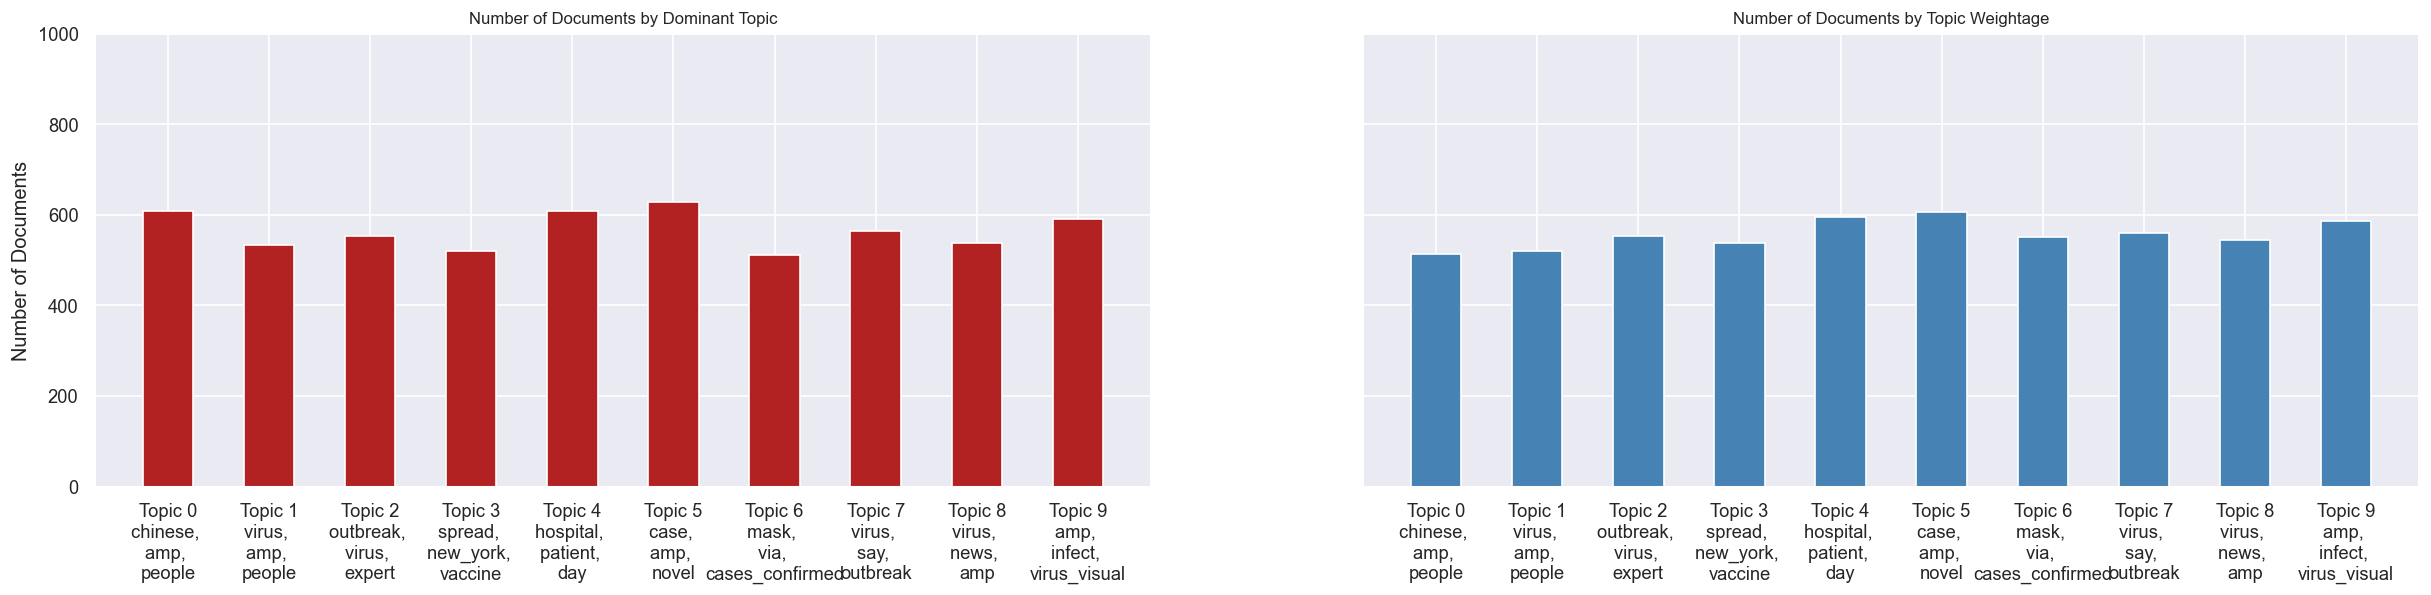

In [306]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 5), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()